In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [85]:
train = pd.read_csv("./playground-series-s4e5/train.csv")
test = pd.read_csv("./playground-series-s4e5/test.csv")

In [86]:
# * Sklearn

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


In [87]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

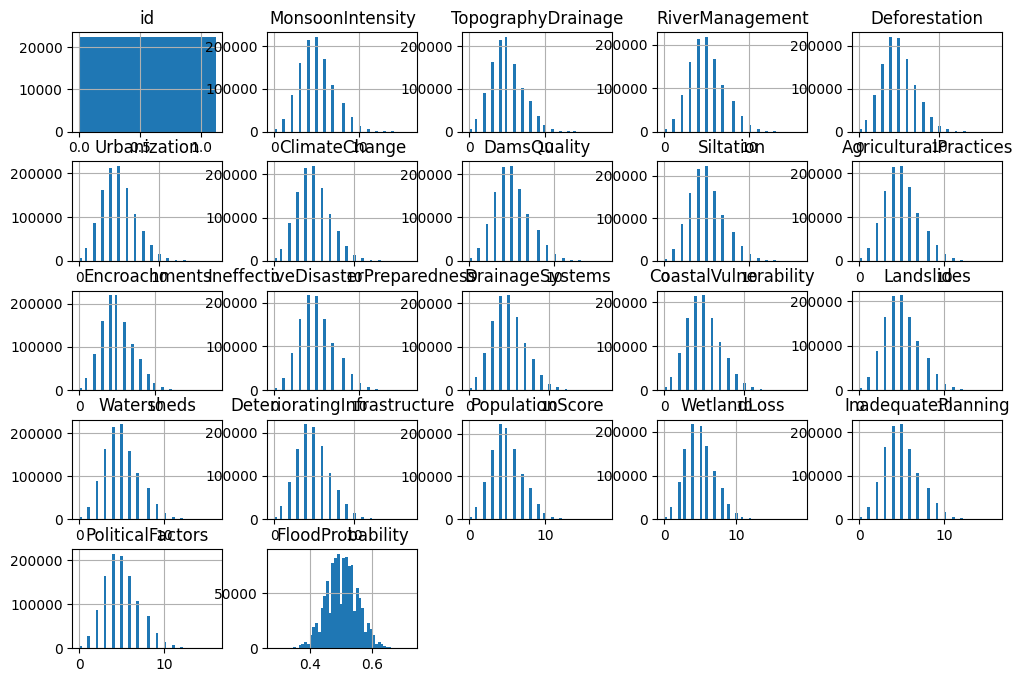

In [88]:
train.hist(bins = 50, figsize = (12,8))
plt.show()

In [89]:
train_set, test_set = train_test_split(train, test_size = 0.2, random_state= 42)

In [90]:
corr_matrix = train_set.corr()

In [91]:
corr_matrix['FloodProbability'].sort_values(ascending = False)

FloodProbability                   1.000000
DeterioratingInfrastructure        0.189532
MonsoonIntensity                   0.189400
DamsQuality                        0.188017
TopographyDrainage                 0.187430
Siltation                          0.187236
RiverManagement                    0.186884
PopulationScore                    0.186399
Landslides                         0.186070
ClimateChange                      0.184481
WetlandLoss                        0.183931
Deforestation                      0.183347
IneffectiveDisasterPreparedness    0.183072
AgriculturalPractices              0.182680
PoliticalFactors                   0.182668
Watersheds                         0.182468
Urbanization                       0.181281
InadequatePlanning                 0.181148
DrainageSystems                    0.179816
Encroachments                      0.178153
CoastalVulnerability               0.177872
id                                -0.000486
Name: FloodProbability, dtype: f

In [92]:
features = train.drop('FloodProbability', axis = 1)
flood = train['FloodProbability'].copy()

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


pipeline = make_pipeline(StandardScaler(), Ridge())

pipeline.fit(features, flood)


Pipeline(steps=[('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [95]:
from sklearn.preprocessing import PolynomialFeatures

pipeline = make_pipeline(StandardScaler(),  PolynomialFeatures(degree = 2), LinearRegression())
pipeline.fit(features, flood)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [96]:
flood_predictions = pipeline.predict(features)
flood_predictions[:5].round(-2)

array([0., 0., 0., 0., 0.])

In [97]:
flood_predictions[:5]

array([0.47755241, 0.47696018, 0.50533009, 0.53393936, 0.35984421])

In [98]:
flood.iloc[:5]

0    0.445
1    0.450
2    0.530
3    0.535
4    0.415
Name: FloodProbability, dtype: float64

In [99]:
from sklearn.model_selection import cross_val_score

flood_rmses = -cross_val_score(pipeline, features, flood, scoring = "neg_root_mean_squared_error", cv = 10)

In [100]:
pd.Series(flood_rmses).describe()

count    10.000000
mean      0.020057
std       0.000046
min       0.020009
25%       0.020026
50%       0.020042
75%       0.020085
max       0.020144
dtype: float64

In [101]:
features

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,0,5,8,5,8,6,4,4,3,3,...,2,5,3,3,5,4,7,5,7,3
1,1,6,7,4,4,8,8,3,5,4,...,9,7,2,0,3,5,3,3,4,3
2,2,6,5,6,7,3,7,1,5,4,...,6,7,3,7,5,6,8,2,3,3
3,3,3,4,6,5,4,8,4,7,6,...,5,2,4,7,4,4,6,5,7,5
4,4,5,3,2,6,4,4,3,3,3,...,5,2,2,6,6,4,1,2,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117952,1117952,3,3,4,10,4,5,5,7,10,...,3,7,8,7,2,2,1,4,6,4
1117953,1117953,2,2,4,3,9,5,8,1,3,...,5,9,4,4,3,7,4,9,4,5
1117954,1117954,7,3,9,4,6,5,9,1,3,...,5,5,5,5,5,6,5,5,2,4
1117955,1117955,7,3,3,7,5,2,3,4,6,...,6,6,8,5,3,4,6,7,6,4


In [102]:
flood

0          0.445
1          0.450
2          0.530
3          0.535
4          0.415
           ...  
1117952    0.495
1117953    0.480
1117954    0.485
1117955    0.495
1117956    0.560
Name: FloodProbability, Length: 1117957, dtype: float64

In [103]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = make_pipeline(RandomForestRegressor(random_state= 42))



In [104]:
# forest_rmses = -cross_val_score(forest_reg, features, flood, scoring= "neg_root_mean_squared_error", cv = 3)

In [105]:
from sklearn.metrics import root_mean_squared_error

lin_rmse = root_mean_squared_error(flood, flood_predictions)

In [106]:
lin_rmse

0.02005240383784496

In [107]:
test

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,...,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,...,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,...,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,...,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,...,4,3,2,6,4,6,8,4,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745300,1863257,5,4,8,3,5,4,4,5,5,...,5,6,1,3,5,6,4,4,6,6
745301,1863258,4,4,2,12,4,3,4,3,5,...,3,7,4,4,3,5,5,3,5,4
745302,1863259,5,7,9,5,5,6,7,5,5,...,6,11,3,11,4,5,9,5,5,4
745303,1863260,4,7,6,3,5,2,3,8,6,...,6,6,8,6,2,3,8,7,5,5


In [108]:
ans = pipeline.predict(test)

In [109]:
answer = pd.DataFrame({"id": test['id'], "FloodProbability" : ans})

In [110]:
answer.to_csv("submission.csv", index = False)